In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wind-speed-prediction-dataset/wind_dataset.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

wind_df = pd.read_csv('/kaggle/input/wind-speed-prediction-dataset/wind_dataset.csv')

In [25]:
wind_df

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5
...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5


In [16]:
wind_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [4]:
wind_df['DATE'] = pd.to_datetime(wind_df['DATE'])

In [19]:
wind_df.columns

Index(['DATE', 'WIND', 'IND', 'RAIN', 'IND.1', 'T.MAX', 'IND.2', 'T.MIN',
       'T.MIN.G'],
      dtype='object')

In [22]:
wind_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     6574 non-null   datetime64[ns]
 1   WIND     6574 non-null   float64       
 2   IND      6574 non-null   int64         
 3   RAIN     6574 non-null   float64       
 4   IND.1    6513 non-null   float64       
 5   T.MAX    5953 non-null   float64       
 6   IND.2    6513 non-null   float64       
 7   T.MIN    5900 non-null   float64       
 8   T.MIN.G  6214 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 462.4 KB


<Figure size 1200x600 with 0 Axes>

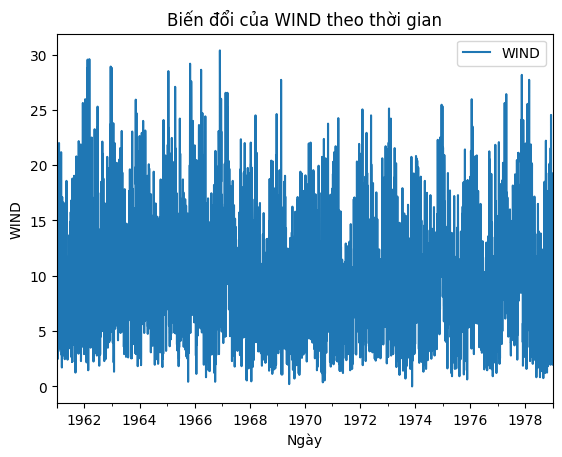

<Figure size 1200x600 with 0 Axes>

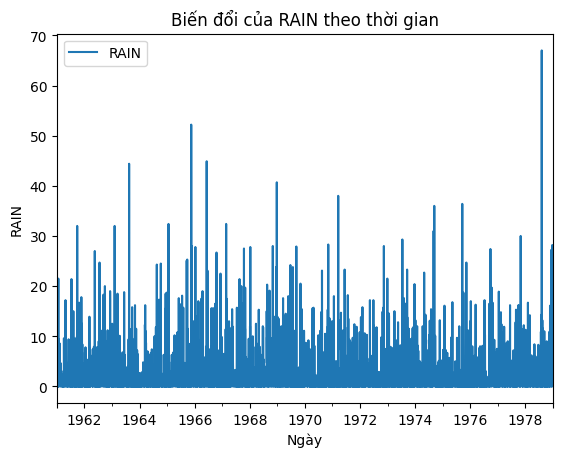

<Figure size 1200x600 with 0 Axes>

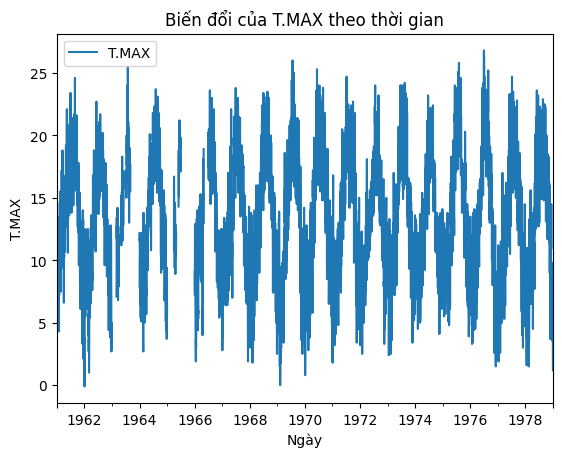

<Figure size 1200x600 with 0 Axes>

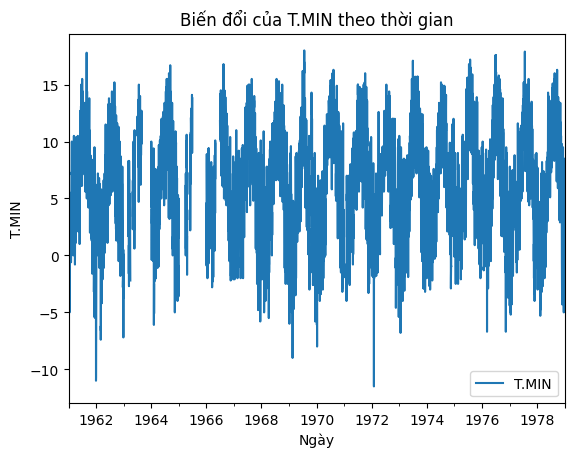

<Figure size 1200x600 with 0 Axes>

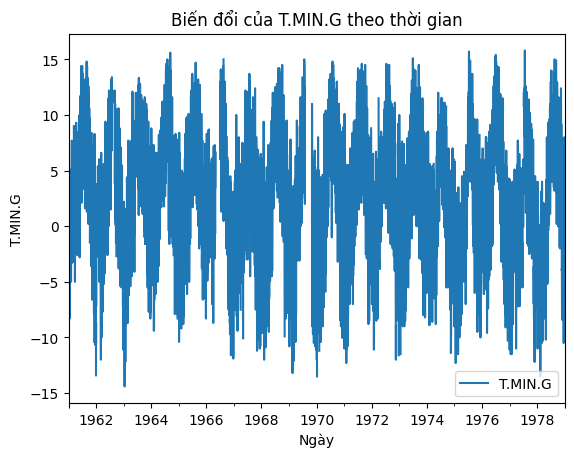

<Figure size 1200x600 with 0 Axes>

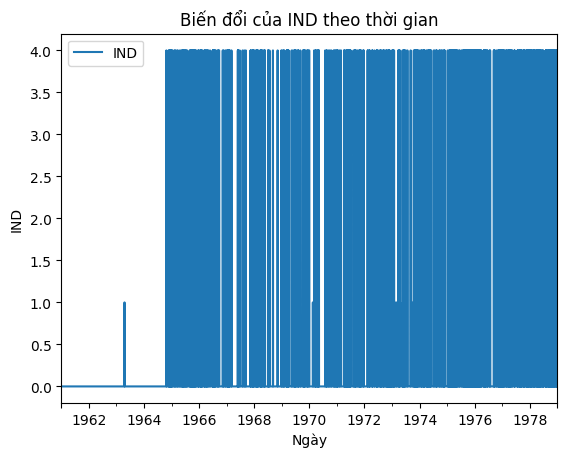

<Figure size 1200x600 with 0 Axes>

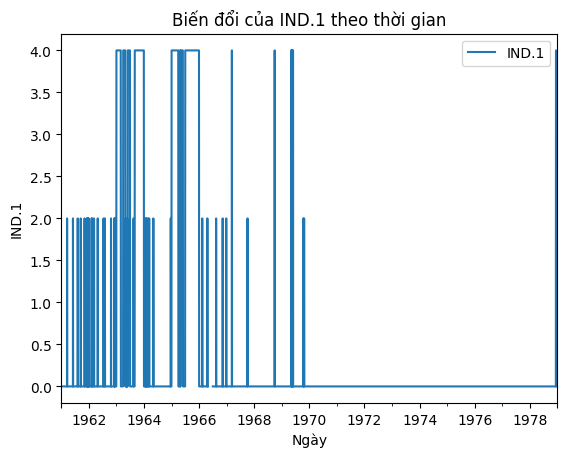

<Figure size 1200x600 with 0 Axes>

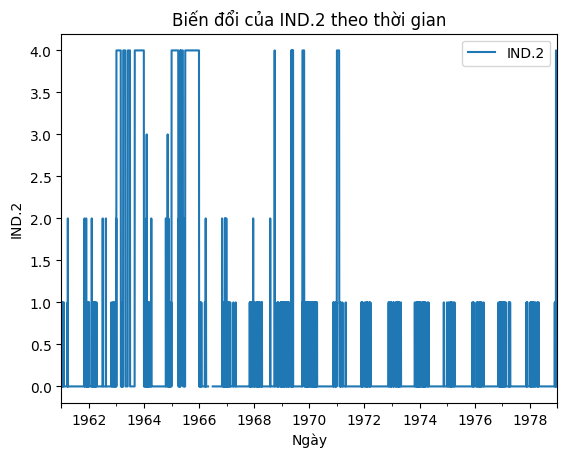

In [5]:
# Kiểm tra các biến thay đổi theo thời gian
for col in ['WIND', 'RAIN', 'T.MAX', 'T.MIN', 'T.MIN.G']:
    plt.figure(figsize=(12, 6))
    wind_df.plot(x='DATE', y=col, kind='line')
    plt.title(f"Biến đổi của {col} theo thời gian")
    plt.xlabel('Ngày')
    plt.ylabel(col)
    plt.show()

# Kiểm tra các chỉ số thay đổi theo thời gian
for col in ['IND', 'IND.1', 'IND.2']:
    plt.figure(figsize=(12, 6))
    wind_df.plot(x='DATE', y=col, kind='line')
    plt.title(f"Biến đổi của {col} theo thời gian")
    plt.xlabel('Ngày')
    plt.ylabel(col)
    plt.show()

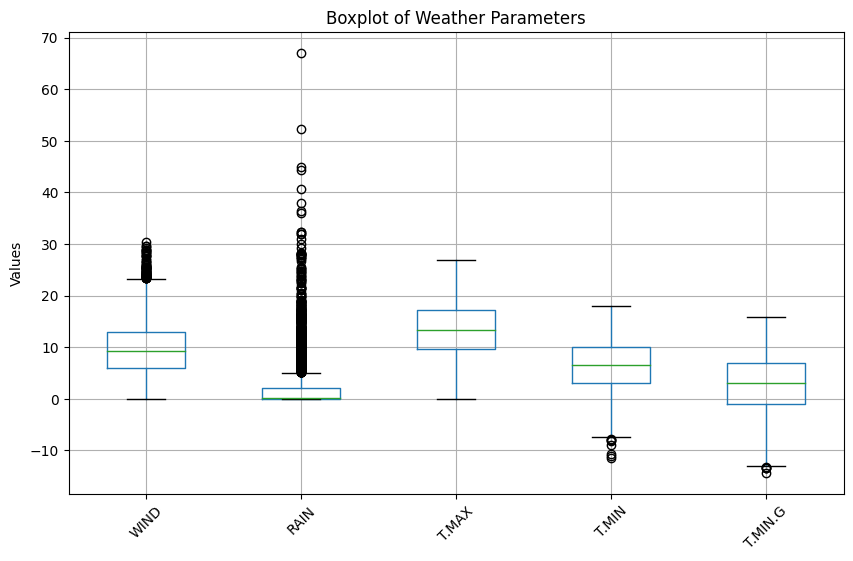

In [6]:

# Nhóm 1: Các thông số liên tục liên quan đến thời tiết
group1 = wind_df[['WIND', 'RAIN', 'T.MAX', 'T.MIN', 'T.MIN.G']]

# Vẽ boxplot cho nhóm 1
plt.figure(figsize=(10, 6))
group1.boxplot()
plt.title('Boxplot of Weather Parameters')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


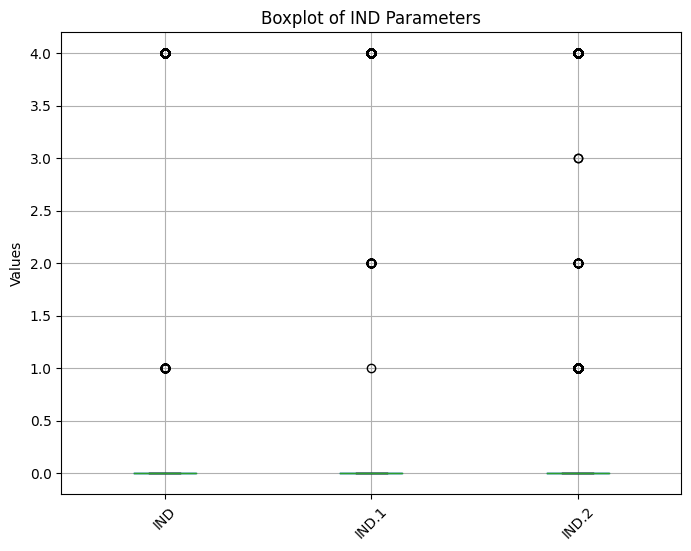

In [7]:
# Nhóm 2: Các chỉ số IND, IND.1, IND.2
group2 = wind_df[['IND', 'IND.1', 'IND.2']]

# Vẽ boxplot cho nhóm 2
plt.figure(figsize=(8, 6))
group2.boxplot()
plt.title('Boxplot of IND Parameters')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [8]:
wind_df.drop('DATE', axis=1).describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5
...,...,...,...,...,...,...,...,...
6569,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6570,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6571,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6572,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5


Check Normal Distribution by Kolmogorov-Smirnov Test

In [11]:
from scipy.stats import kstest

# Giả sử bạn có dữ liệu trong cột 'WIND'
wind_data = wind_df['WIND'].dropna()
rain_data = wind_df['RAIN'].dropna()

# Thực hiện Kolmogorov-Smirnov Test
stat_wind, p_value_wind = kstest(wind_data, 'norm', args=(wind_data.mean(), wind_data.std()))
stat_rain, p_value_rain = kstest(rain_data, 'norm', args=(rain_data.mean(), rain_data.std()))

print(f'K-S Test for WIND: Statistics={stat_wind:.3f}, p-value={p_value_wind:.3f}')
print(f'K-S Test for RAIN: Statistics={stat_rain:.3f}, p-value={p_value_rain:.3f}')

# Kiểm tra kết quả
alpha = 0.05
if p_value_wind > alpha:
    print('WIND: Không bác bỏ H₀, dữ liệu có phân phối chuẩn.')
else:
    print('WIND: Bác bỏ H₀, dữ liệu không có phân phối chuẩn.')

if p_value_rain > alpha:
    print('RAIN: Không bác bỏ H₀, dữ liệu có phân phối chuẩn.')
else:
    print('RAIN: Bác bỏ H₀, dữ liệu không có phân phối chuẩn.')

K-S Test for WIND: Statistics=0.053, p-value=0.000
K-S Test for RAIN: Statistics=0.320, p-value=0.000
WIND: Bác bỏ H₀, dữ liệu không có phân phối chuẩn.
RAIN: Bác bỏ H₀, dữ liệu không có phân phối chuẩn.


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def gaussian_kernel(u):
    # Gaussian Kernel Function
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)

def kde(data, x_points, bandwidth):
    n = len(data)
    kde_values = np.zeros(len(x_points))
    
    for i, x in enumerate(x_points):
        kde_values[i] = np.sum(gaussian_kernel((x - data) / bandwidth)) / (n * bandwidth)
    
    return kde_values


[3.89337530e-05 1.70572880e-04 5.61410272e-04 1.44229505e-03
 3.05494925e-03 5.66887692e-03 9.51944497e-03 1.44629451e-02
 2.00703851e-02 2.63213485e-02 3.33391321e-02 4.03943061e-02
 4.62598160e-02 5.05613400e-02 5.40993019e-02 5.77056431e-02
 6.13092479e-02 6.42525351e-02 6.62790954e-02 6.82611945e-02
 7.10047914e-02 7.35855883e-02 7.47630585e-02 7.50405544e-02
 7.56627945e-02 7.70102732e-02 7.89074586e-02 8.10400812e-02
 8.25008630e-02 8.23230924e-02 8.09446643e-02 7.95717114e-02
 7.82168076e-02 7.61382997e-02 7.34819591e-02 7.12120964e-02
 6.96907420e-02 6.81503471e-02 6.58323494e-02 6.26833888e-02
 5.89734330e-02 5.53497661e-02 5.26442314e-02 5.07322924e-02
 4.88352380e-02 4.69714303e-02 4.54842987e-02 4.39748154e-02
 4.18585282e-02 3.90904332e-02 3.60699047e-02 3.33911222e-02
 3.14609879e-02 3.01686843e-02 2.90086097e-02 2.74223312e-02
 2.51975687e-02 2.26050949e-02 2.00343942e-02 1.77683406e-02
 1.61524050e-02 1.53935614e-02 1.50777525e-02 1.45396772e-02
 1.35834531e-02 1.229086

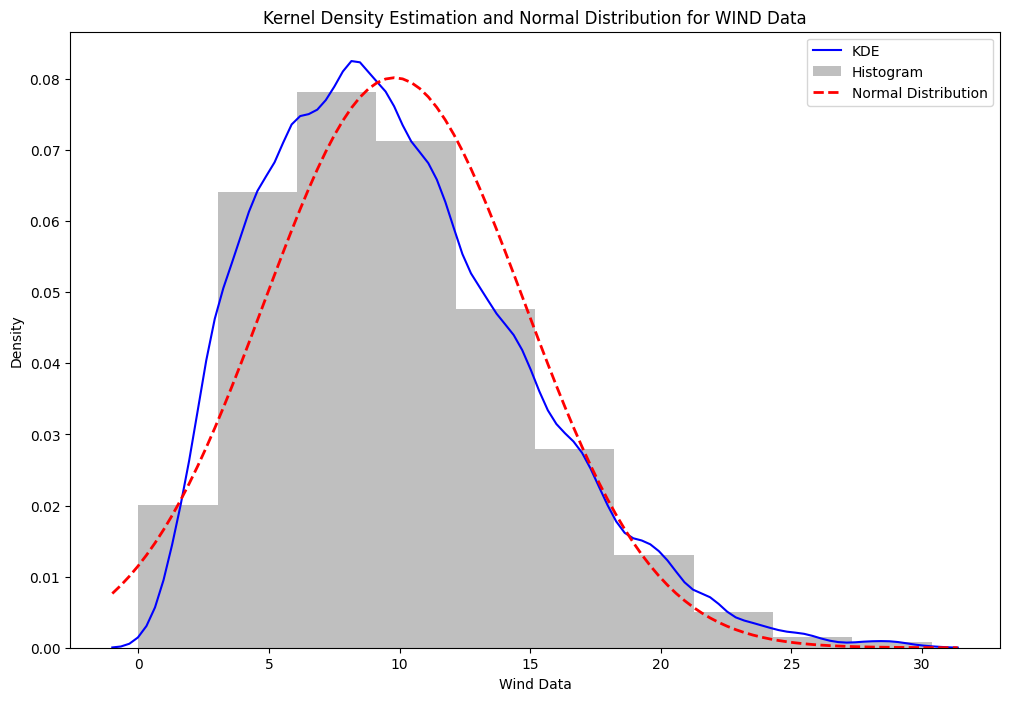

In [24]:
x_points = np.linspace(min(wind_data) - 1, max(wind_data) + 1, 100)
bandwidth = 0.5  # Adjust bandwidth as needed

# Calculate KDE
kde_values_wind = kde(wind_data, x_points, bandwidth)
print(kde_values_wind)
# Calculate Normal Distribution
mu, std = norm.fit(wind_data)
normal_dist = norm.pdf(x_points, mu, std)

# Plotting the result
plt.figure(figsize=(12, 8))
plt.plot(x_points, kde_values, label='KDE', color='blue')
plt.hist(wind_data, bins=10, density=True, alpha=0.5, color='gray', label='Histogram')
plt.plot(x_points, normal_dist, 'r--', label='Normal Distribution', linewidth=2)
plt.title('Kernel Density Estimation and Normal Distribution for WIND Data')
plt.xlabel('Wind Data')
plt.ylabel('Density')
plt.legend()
plt.show()

[5.33253395e-02 3.62378665e-01 4.23202597e-01 1.65841222e-01
 8.52724731e-02 5.91802880e-02 4.59383873e-02 3.76604417e-02
 3.15710181e-02 2.55752191e-02 1.97437306e-02 1.54467697e-02
 1.30194023e-02 1.19055754e-02 9.12249863e-03 8.16447130e-03
 6.93496447e-03 5.93143185e-03 6.30828112e-03 5.09132355e-03
 3.96439494e-03 3.69885236e-03 3.07634427e-03 3.25710978e-03
 3.51995363e-03 3.23344701e-03 2.80528576e-03 2.22321791e-03
 1.85513967e-03 1.29476086e-03 8.69590950e-04 7.13165940e-04
 7.31456015e-04 5.70526051e-04 7.32399717e-04 9.51078520e-04
 8.65475179e-04 8.27716042e-04 5.21075261e-04 2.44423603e-04
 5.57771438e-04 1.08478033e-03 8.98250450e-04 2.85084594e-04
 1.99837200e-04 1.61041959e-04 1.81793047e-04 3.60919115e-04
 4.03639487e-04 9.55757980e-05 3.92704045e-06 1.91364313e-06
 4.68349870e-05 1.99908433e-04 1.65479556e-04 7.46191472e-05
 1.21775342e-04 4.21927023e-05 6.78194686e-06 6.21214908e-05
 1.18026325e-04 3.21334547e-05 1.26185474e-06 1.47442946e-06
 3.86679521e-05 1.786156

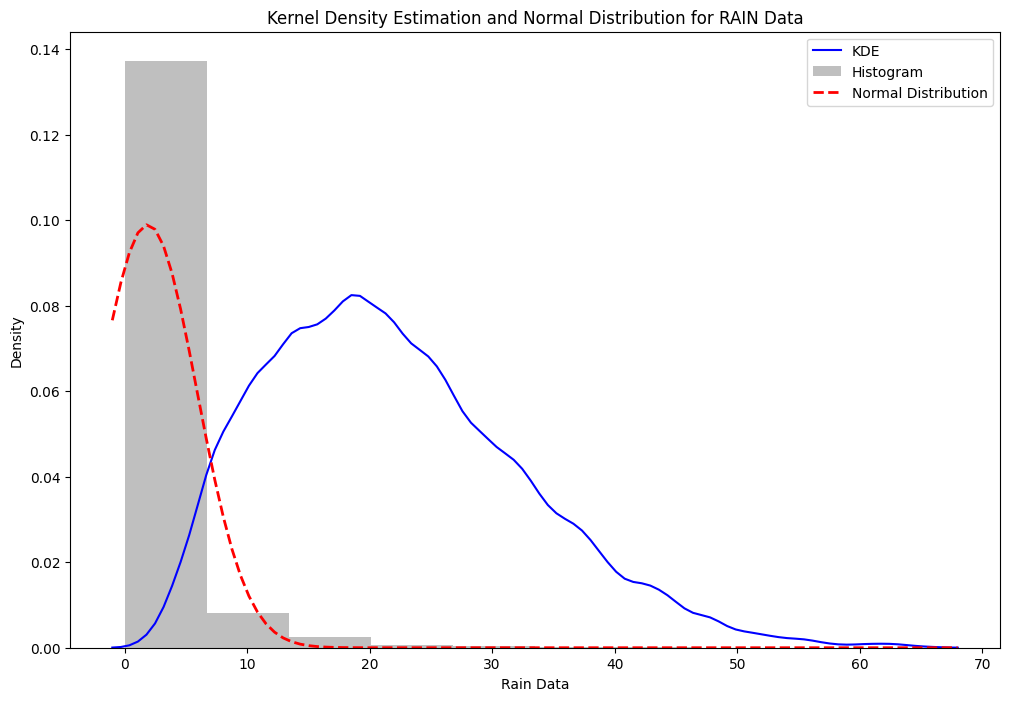

In [25]:
x_points = np.linspace(min(rain_data) - 1, max(rain_data) + 1, 100)
bandwidth = 0.5  # Adjust bandwidth as needed

# Calculate KDE
kde_values_rain = kde(rain_data, x_points, bandwidth)
print(kde_values_rain)
# Calculate Normal Distribution
mu, std = norm.fit(rain_data)
normal_dist = norm.pdf(x_points, mu, std)

# Plotting the result
plt.figure(figsize=(12, 8))
plt.plot(x_points, kde_values, label='KDE', color='blue')
plt.hist(rain_data, bins=10, density=True, alpha=0.5, color='gray', label='Histogram')
plt.plot(x_points, normal_dist, 'r--', label='Normal Distribution', linewidth=2)
plt.title('Kernel Density Estimation and Normal Distribution for RAIN Data')
plt.xlabel('Rain Data')
plt.ylabel('Density')
plt.legend()
plt.show()

In [29]:
# First Moment (Mean)
mean = np.mean(wind_data)

# Second Moment
second_moment = np.mean(wind_data**2)

# Second Central Moment (Variance)
variance = second_moment - mean**2

# Results
print(f"Điểm Kỳ Vọng (Mean) of Wind: {mean:.2f}")
print(f"Mô Mô Thứ Hai (Second Moment) of Wind: {second_moment:.2f}")
print(f"Phương Sai (Variance) of Wind: {variance:.2f}")

Điểm Kỳ Vọng (Mean) of Wind: 9.80
Mô Mô Thứ Hai (Second Moment) of Wind: 120.75
Phương Sai (Variance) of Wind: 24.77


In [28]:
# First Moment (Mean)
mean = np.mean(rain_data)

# Second Moment
second_moment = np.mean(wind_data**2)

# Second Central Moment (Variance)
variance = second_moment - mean**2

# Results
print(f"Điểm Kỳ Vọng (Mean) of Rain: {mean:.2f}")
print(f"Mô Mô Thứ Hai (Second Moment) of Rain: {second_moment:.2f}")
print(f"Phương Sai (Variance) of Rain: {variance:.2f}")

Điểm Kỳ Vọng (Mean) of Rain: 1.89
Mô Mô Thứ Hai (Second Moment) of Rain: 120.75
Phương Sai (Variance) of Rain: 117.19


Ma trận tương quan:


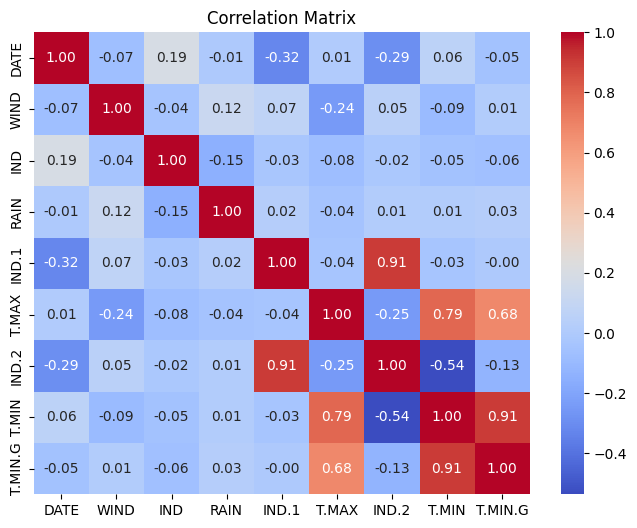

In [34]:
import seaborn as sns

# Tính hệ số tương quan
correlation_matrix = wind_df.corr()
print("Ma trận tương quan:")
# print(correlation_matrix)

# Vẽ Ma Trận Tương Quan
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


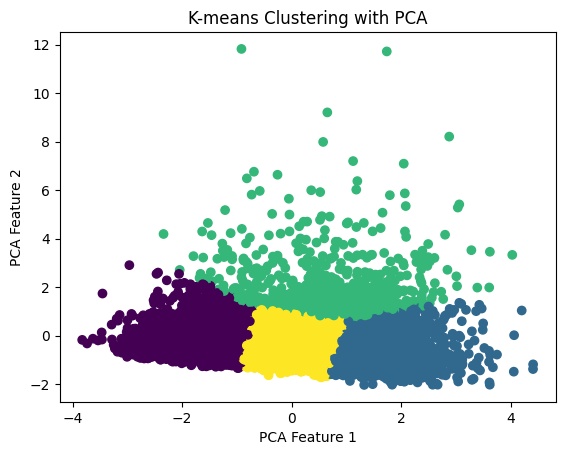

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Xử lý dữ liệu thiếu
wind_df.fillna(wind_df.mean(), inplace=True)

# Chọn các đặc trưng để phân cụm
features = wind_df[['WIND', 'RAIN', 'T.MAX', 'T.MIN']]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Giảm số chiều bằng PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Thực hiện phân cụm k-means
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(pca_features)

# Thêm nhãn cụm vào dữ liệu
wind_df['Cluster'] = clusters

# Hiển thị kết quả
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('K-means Clustering with PCA')
plt.show()

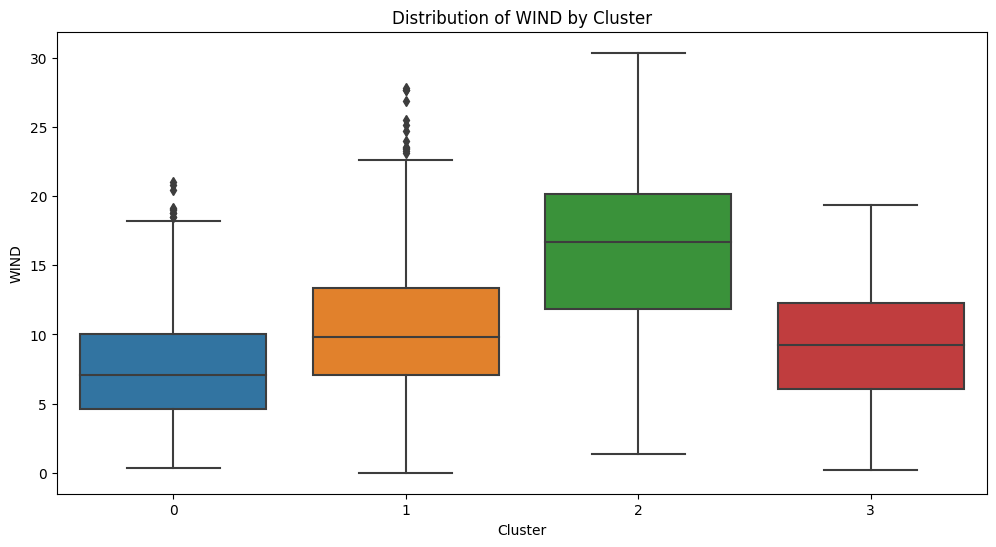

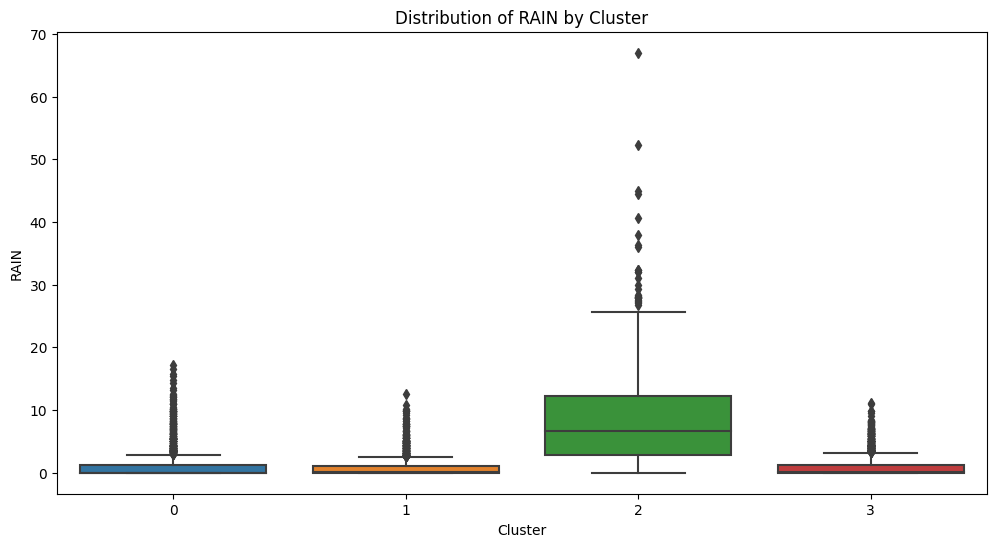

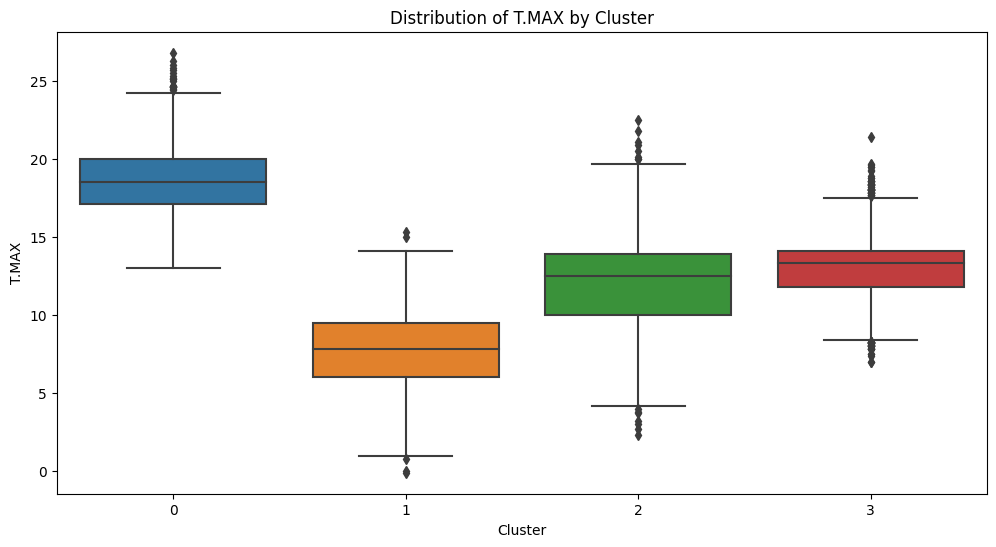

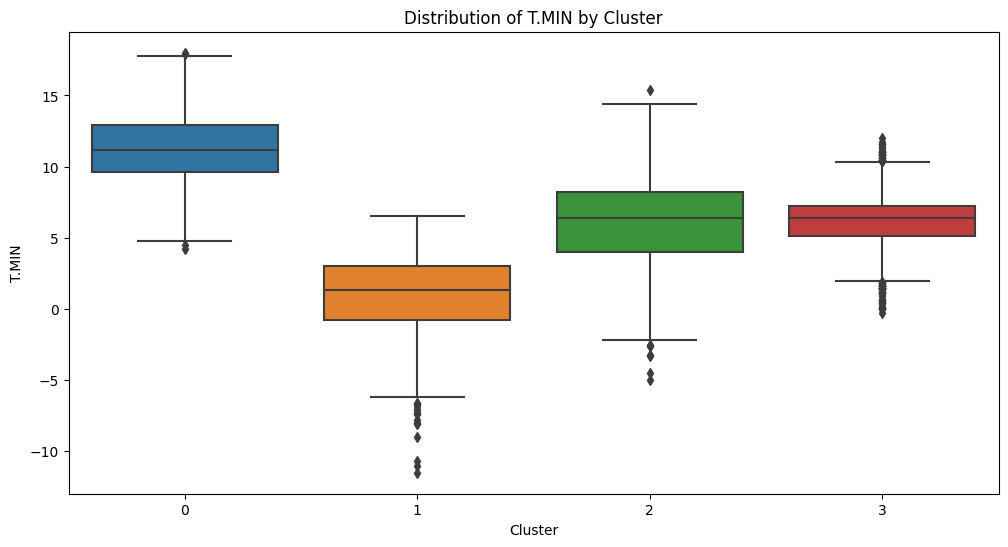

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ phân phối đặc trưng 'WIND' theo từng cụm
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='WIND', data=wind_df)
plt.title('Distribution of WIND by Cluster')
plt.show()

# Vẽ phân phối đặc trưng 'RAIN' theo từng cụm
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='RAIN', data=wind_df)
plt.title('Distribution of RAIN by Cluster')
plt.show()

# Vẽ phân phối đặc trưng 'T.MAX' theo từng cụm
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='T.MAX', data=wind_df)
plt.title('Distribution of T.MAX by Cluster')
plt.show()

# Vẽ phân phối đặc trưng 'T.MIN' theo từng cụm
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='T.MIN', data=wind_df)
plt.title('Distribution of T.MIN by Cluster')
plt.show()


In [45]:
# Tính toán trung bình của các đặc trưng trong từng cụm
cluster_means = wind_df.groupby('Cluster')[['WIND', 'RAIN', 'T.MAX', 'T.MIN']].mean()

# Tính toán phương sai của các đặc trưng trong từng cụm
cluster_variances = wind_df.groupby('Cluster')[['WIND', 'RAIN', 'T.MAX', 'T.MIN']].var()

print("Trung bình của các đặc trưng trong từng cụm:\n", cluster_means)
print("Phương sai của các đặc trưng trong từng cụm:\n", cluster_variances)


Trung bình của các đặc trưng trong từng cụm:
               WIND      RAIN      T.MAX      T.MIN
Cluster                                           
0         7.540918  1.138038  18.700577  11.181044
1        10.290215  0.907040   7.706128   1.008348
2        15.921662  8.646277  12.122762   6.082271
3         9.350596  0.978421  13.060696   6.179105
Phương sai của các đặc trưng trong từng cụm:
               WIND       RAIN      T.MAX      T.MIN
Cluster                                            
0        14.493013   5.386358   5.131522   5.261661
1        21.010203   2.868130   6.186812   7.356855
2        31.254362  62.354367  10.496133  11.108346
3        17.130118   2.699526   4.390448   3.719352


### Cluster 0:
- **Averages:**
  - WIND: 7.54
  - RAIN: 1.14
  - T.MAX: 18.70
  - T.MIN: 11.18
- **Variance:**
  - WIND: 14.49
  - RAIN: 5.39
  - T.MAX: 5.13
  - T.MIN: 5.26

This cluster has low average WIND and RAIN, but higher T.MAX and T.MIN. Variances are moderate, indicating some stability.

### Cluster 1:
- **Averages:**
  - WIND: 10.29
  - RAIN: 0.91
  - T.MAX: 7.71
  - T.MIN: 1.01
- **Variance:**
  - WIND: 21.01
  - RAIN: 2.87
  - T.MAX: 6.87
  - T.MIN: 7.36

This cluster has the lowest T.MAX and T.MIN, but higher WIND. The highest variance in WIND indicates significant variability.

### Cluster 2:
- **Averages:**
  - WIND: 15.92
  - RAIN: 8.65
  - T.MAX: 12.12
  - T.MIN: 6.08
- **Variance:**
  - WIND: 31.25
  - RAIN: 62.35
  - T.MAX: 10.50
  - T.MIN: 11.11

This cluster has the highest averages for both WIND and RAIN. The very high variance in RAIN shows large fluctuations.

### Cluster 3:
- **Averages:**
  - WIND: 9.35
  - RAIN: 0.98
  - T.MAX: 13.06
  - T.MIN: 6.18
- **Variance:**
  - WIND: 17.13
  - RAIN: 2.70
  - T.MAX: 4.39
  - T.MIN: 3.72

This cluster has moderate T.MAX and T.MIN, with the lowest variances, indicating stability.

### Summary:
- **Cluster 2** shows the most variability, especially in RAIN.
- **Cluster 1** has the lowest temperatures.
- **Clusters 0** and **3** are more stable compared to others.